# Proyecto 6: proyecto integrado


## Preambulo; se cargan librerias y se declara la funcion de exploracion

In [8]:
#cargamos las librerias a ser utilizadas durante el proyecto y Creamos una funcion para poder hacer mas facil la exploracion 

import numpy as np
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
import sidetable as stb
import seaborn as sns
sns.set_theme()

def looks(datos):
    print("Se ejecuta la descripcion de los datos:")
    print(datos.describe(include= "all"))
    print()
    print("se hace exploracion con metodo info:")
    datos.info()
    print()
    print("se hace una observacion con el metodo Head:")
    print(datos.head())
    print()
    print("hay NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

## Parte 1 & 2
### ETL

In [11]:
# Cargamos los datos
games = pd.read_csv("datasets/games.csv")
# games # se verifica la lectura es correcta

In [64]:
looks(games)
#Se observa que hay mayusculas en los nombres se convierte todo a minusculas para estandarizar
games.columns = games.columns.str.lower()

Se ejecuta la descripcion de los datos:
                               name platform  year_of_release   genre  \
count                         16715    16715     16715.000000   16715   
unique                        11560       31              NaN      13   
top     Need for Speed: Most Wanted      PS2              NaN  Action   
freq                             12     2161              NaN    3369   
mean                            NaN      NaN      1974.193599     NaN   
std                             NaN      NaN       252.559930     NaN   
min                             NaN      NaN         0.000000     NaN   
25%                             NaN      NaN      2003.000000     NaN   
50%                             NaN      NaN      2007.000000     NaN   
75%                             NaN      NaN      2010.000000     NaN   
max                             NaN      NaN      2016.000000     NaN   

            na_sales      eu_sales      jp_sales   other_sales  critic_score  \
cou

In [62]:
#se usa sidetable para obtener el porcentaje de datos nulos por columna
games.stb.missing(style= True)

,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
name,0,"16,715",0.00%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
genre,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


Encontramos que hay NA en 
- 2 en nombre (no hay ninguna info de ello, se decide eliminar)
- 369 en año de lanzamiento (Se observa que son datos desconocidos, se establece un dato como 0)
- 2 en genero (Se observa que son datos desconocidos, se establece un dato generico)

Debido a la gran cantidad de datos perdidos (superior al 10%) se decide no tocar ni remplazar datos que podrian perjudicar mas que beneficiar al asignarse un dato arbitrario en la imputacion. 

Las columnas que presentan esto son:
- 8578 en critic score 
- 6701 en user score 
- 6766 en rating 

Es posible que estas ausencias se deban a temas de coleccion de datos o, en el caso de los usuarios seleccionaron en el cuestionario NA o simplemente no se recolectaron datos para algun juego en particular.

Salta a la vista que sean tantos, lo correcto seria acudir con el dueño de los datos y presentar esto para obtner mas informacion en caso de existir y notificar para que este enterado

Al momento de hacer analisis se excluiran los valores nulos de la columna en particular de requerirse. 

In [68]:
#Se observa que hay mayusculas en los nombres se convierte todo a minusculas para estandarizar
games.columns = games.columns.str.lower()


#correcciones de los datos:
games["year_of_release"] = games["year_of_release"].fillna(0).astype("int")
games["name"] = games["name"].fillna("Desconocido")
games["genre"] = games["genre"].fillna("Desconocido")
#se remplazan los tbd por NA para poder convertir la columna a float y poder hacer calculos con ella
games.loc[games["user_score"]== "tbd","user_score"] = np.nan
games["user_score"] = games["user_score"].astype("float")
games["gbl_sales"] = games["eu_sales"] + games["na_sales"] + games["jp_sales"] + games["other_sales"]

In [67]:
#Celda para hacer la exploracion indivudual de las columnas con valores perdidos y entender mas el contexto del mismo. 
# Va abajo de las correcciones por practicidad al momento de hacer los movimientos

#games[games["user_score"].isna()]
#games["user_score"].value_counts()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,gbl_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


## Parte 3
### Analisis de los datos

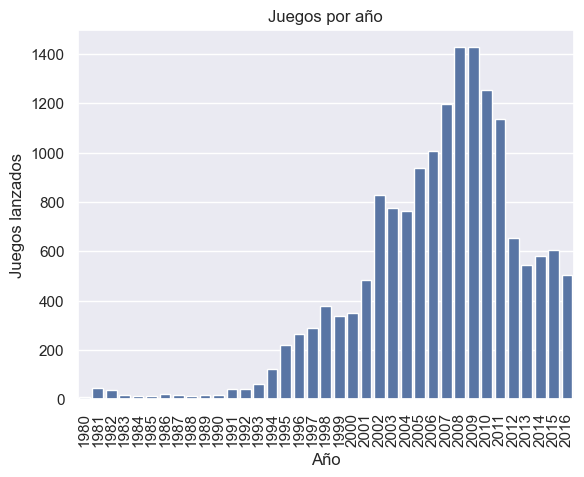

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               62
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


In [49]:
#se hace una exploracion de juegos por año
per_year = games[games["year_of_release"]!=0].pivot_table(index= ["year_of_release"], values= "name", aggfunc= "count")
graf1 = sns.barplot(data= per_year.reset_index(), x="year_of_release",y="name")
plt.xticks(rotation=90)
graf1.set(title="Juegos por año", xlabel='Año', ylabel='Juegos lanzados')
plt.show()
print(per_year)

In [119]:
sales_per_plat = games[games["year_of_release"]!=0].pivot_table(index= ["platform"], values= "gbl_sales", aggfunc= "sum")
sales_per_plat = sales_per_plat.reset_index().sort_values("gbl_sales",ascending=False)
print(sales_per_plat.head(10))

   platform  gbl_sales
16      PS2    1233.56
28     X360     961.24
17      PS3     931.34
26      Wii     891.18
4        DS     802.78
15       PS     727.58
18      PS4     314.14
6       GBA     312.88
19      PSP     289.53
2       3DS     257.81


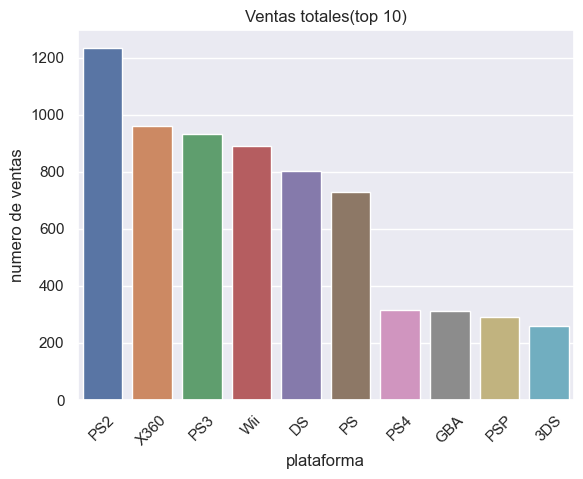

In [ ]:
graf2 = sns.barplot(data= sales_per_plat.head(10), x="platform",y="gbl_sales",hue="platform")
plt.xticks(rotation=45)
graf2.set(title="Ventas totales(top 10)", xlabel='plataforma', ylabel='numero de ventas')
plt.show()
